<a href="https://colab.research.google.com/github/AnalyticsKnight/yemoonsaBigdata/blob/dev/src/P3_C4_PythonExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chapter 4. 빅데이터분석기사 6회**

#### 000 소스 및 데이터 동기화

In [1]:
!git clone https://github.com/AnalyticsKnight/yemoonsaBigdata/

Cloning into 'yemoonsaBigdata'...
remote: Enumerating objects: 656, done.
remote: Counting objects: 100% (293/293), done.
remote: Compressing objects: 100% (183/183), done.
remote: Total 656 (delta 140), reused 198 (delta 110), pack-reused 363
Receiving objects: 100% (656/656), 10.83 MiB | 15.69 MiB/s, done.
Resolving deltas: 100% (325/325), done.


In [ ]:
path = '/content/yemoonsaBigdata/datasets/Part3/ex6/'
#path = '/content/drive/MyDrive/01.Lecture/05.빅분기실기/00.datas/6회/'

## 1. 작업형 제1유형

### (1) 첫 번째 문제

- 주어진 데이터 세트는 소방서별 신고접수시간, 출발시간, 도착시간이다. 신고접수 후 출발시간까지를 대응시간, 출발시간에서 도착시간까지를 출동시간이라 한다. 소방서별 출동시간 평균이 가장 큰 소방서의 출동시간 평균을 구하시오. (소수 둘째자리 반올림)

#### 511-01 데이터 불러오기

In [ ]:
import pandas as pd

file = path + '06.01.01-Fire Station Data.csv'

df = pd.read_csv(file, encoding='cp949') #, encoding='cp949'
print(df.head())

      소방서ID            신고접수시간              출발시간              도착시간
0  StationS  2023-07-08 21:05  2023-07-08 21:09  2023-07-08 21:37
1  StationI   2023-06-04 8:11   2023-06-04 8:14   2023-06-04 8:58
2  StationJ  2023-01-31 16:20  2023-01-31 16:23  2023-01-31 16:44
3  StationD  2023-03-10 17:31  2023-03-10 17:32  2023-03-10 18:03
4  StationB   2023-06-18 7:23   2023-06-18 7:26   2023-06-18 8:18


#### 511-02 신고접수시간, 출발시간, 도착시간 날짜타입 변환하기

In [ ]:
df1 = df.copy()

In [ ]:
#### 문자타입을 날짜 타입으로 변경하기
df1['신고접수시간'] = pd.to_datetime(df1['신고접수시간'])
df1['출발시간'] = pd.to_datetime(df1['출발시간'])
df1['도착시간'] = pd.to_datetime(df1['도착시간'])

print(df1.head())

      소방서ID              신고접수시간                출발시간                도착시간
0  StationS 2023-07-08 21:05:00 2023-07-08 21:09:00 2023-07-08 21:37:00
1  StationI 2023-06-04 08:11:00 2023-06-04 08:14:00 2023-06-04 08:58:00
2  StationJ 2023-01-31 16:20:00 2023-01-31 16:23:00 2023-01-31 16:44:00
3  StationD 2023-03-10 17:31:00 2023-03-10 17:32:00 2023-03-10 18:03:00
4  StationB 2023-06-18 07:23:00 2023-06-18 07:26:00 2023-06-18 08:18:00


#### 511-03 대응시간, 출동시간 값 구하기

In [ ]:
# 대응시간, 출동시간 값 구하기
df1['대응시간'] = df1['출발시간'] - df1['신고접수시간']
df1['출동시간'] = df1['도착시간'] - df1['출발시간']

#대응시간, 출동시간을 초로 변환하기
df1['대응시간'] = df1['대응시간'].dt.total_seconds()
df1['출동시간'] = df1['출동시간'].dt.total_seconds()

print(df1)

        소방서ID              신고접수시간                출발시간                도착시간  \
0    StationS 2023-07-08 21:05:00 2023-07-08 21:09:00 2023-07-08 21:37:00   
1    StationI 2023-06-04 08:11:00 2023-06-04 08:14:00 2023-06-04 08:58:00   
2    StationJ 2023-01-31 16:20:00 2023-01-31 16:23:00 2023-01-31 16:44:00   
3    StationD 2023-03-10 17:31:00 2023-03-10 17:32:00 2023-03-10 18:03:00   
4    StationB 2023-06-18 07:23:00 2023-06-18 07:26:00 2023-06-18 08:18:00   
..        ...                 ...                 ...                 ...   
988  StationP 2023-05-14 15:22:00 2023-05-14 15:23:00 2023-05-14 15:29:00   
989  StationY 2023-06-07 21:59:00 2023-06-07 22:02:00 2023-06-07 22:21:00   
990  StationO 2023-09-23 01:07:00 2023-09-23 01:12:00 2023-09-23 01:55:00   
991  StationW 2023-07-24 11:21:00 2023-07-24 11:22:00 2023-07-24 12:02:00   
992  StationE 2023-06-22 18:13:00 2023-06-22 18:14:00 2023-06-22 18:38:00   

      대응시간    출동시간  
0    240.0  1680.0  
1    180.0  2640.0  
2    180.0  

#### 511-04 출동시간 평균 구하기

In [ ]:
# 소방소별 출동시간 평균 구하기
dg = df1.groupby('소방서ID')[['출동시간']].mean()
dg = dg.reset_index()
print(dg.head())
print(type(dg))


      소방서ID         출동시간
0  StationA  1482.000000
1  StationB  1921.463415
2  StationC  1806.521739
3  StationD  2003.636364
4  StationE  1712.000000
<class 'pandas.core.frame.DataFrame'>


#### 511-05 출동시간 평균으로 출동시간이 가장 긴 소방서 찾기

In [ ]:
# 소방소별 출동시간 평균으로 내림차순 정렬하기
dg = dg.sort_values('출동시간', ascending=False)

print(dg.head())

       소방서ID         출동시간
25  StationZ  2276.250000
13  StationN  2106.857143
12  StationM  2010.000000
3   StationD  2003.636364
22  StationW  1988.780488


In [ ]:
#출동시간이 가장 긴 소방서 찾기
result = dg.iloc[0]['소방서ID']
#result = dg.iloc[0, 0]
# dg = dg.reset_index()
# result = dg.loc[0, '소방서ID']

print(result)

StationZ


In [ ]:
## 전체 풀이 코드

import pandas as pd

file = path + '06.01.01-Fire Station Data.csv'
df = pd.read_csv(file, encoding='cp949') #, encoding='cp949'

df1 = df.copy()

#### 문자타입을 날짜 타입으로 변경하기
df1['신고접수시간'] = pd.to_datetime(df1['신고접수시간'])
df1['출발시간'] = pd.to_datetime(df1['출발시간'])
df1['도착시간'] = pd.to_datetime(df1['도착시간'])

#print(df1.head())

# 대응시간, 출동시간 값 구하기
df1['대응시간'] = df1['출발시간'] - df1['신고접수시간']
df1['출동시간'] = df1['도착시간'] - df1['출발시간']

#대응시간, 출동시간을 초로 변환하기
df1['대응시간'] = df1['대응시간'].dt.total_seconds()
df1['출동시간'] = df1['출동시간'].dt.total_seconds()

#print(df1)

# 소방소별 대응시간, 출동시간 평균 구하기
dg = df1.groupby('소방서ID')[['대응시간', '출동시간']].mean()
dg = dg.reset_index()

# 소방소별 출동시간 평균으로 내림차순 정렬하기
dg = dg.sort_values('출동시간', ascending=False)

# 출동시간이 가장 긴 소방서 찾기
result = dg.iloc[0]['소방서ID']
#result = dg.iloc[0, 0]

# dg = dg.reset_index()
# result = dg.loc[0, '소방서ID']

print(result)


StationZ


### (2) 두 번째 문제

- 주어진 데이터 세트는 초등학교 학년별 학생수와 교사수다. 교사 1인당 학생 수가 가장 많은 학교를 찾은 후 그 학교의 전체 학생수를 구하시오.

#### 512-01 데이터 불러오기

In [ ]:
import pandas as pd

file = path + '06.01.02-Elementary School Data.csv'
df = pd.read_csv(file)
print(df.head())

  School Name  1G Students  2G Students  3G Students  4G Students  \
0         ES1           64           48           84           78   
1         ES2           58           62           82           73   
2         ES3           64           79           99           49   
3         ES4           60           96           48           69   
4         ES5           56           71           69           32   

   5G Students  6G Students  Teachers  
0           24           38        15  
1           42           63        15  
2           80           73        23  
3           47           26        18  
4           33          100        22  


#### 512-02 교사 1인당 학생수 구하기

In [ ]:
df1 = df.copy()

#전체 학생수 구하기
#df1['Students'] = df1['1G Students'] + df1['2G Students'] + df1['3G Students'] + df1['4G Students'] + df1['5G Students']+ df1['6G Students']
df1['Students'] = df1[['1G Students','2G Students','3G Students','4G Students','5G Students','6G Students']].sum(axis=1)
print(df1['Students'])

0      336
1      380
2      444
3      346
4      361
      ... 
295    401
296    322
297    223
298    350
299    429
Name: Students, Length: 300, dtype: int64


In [ ]:
#교사 1인당 학생수 구하기
df1['Std per Teachers'] = df1['Students'] / df1['Teachers']
df1.head()

,School Name,1G Students,2G Students,3G Students,4G Students,5G Students,6G Students,Teachers,Students,Std per Teachers
0,ES1,64,48,84,78,24,38,15,336,22.400000
1,ES2,58,62,82,73,42,63,15,380,25.333333
2,ES3,64,79,99,49,80,73,23,444,19.304348
3,ES4,60,96,48,69,47,26,18,346,19.222222
4,ES5,56,71,69,32,33,100,22,361,16.409091


#### 512-03 교사 1인당 학생수가 가장 많은 학교를 찾아 학생수 출력하기

In [ ]:
#교사 1인당 학생수가 가장 많은 학교 찾기
#max  사용
results = df1[df1['Std per Teachers'] == df1['Std per Teachers'].max()][['School Name', 'Students']]
print(results)

  School Name  Students
0        ES87       245


In [ ]:
#학생수 출력하기
result = results[1]
print(result)

245


In [ ]:
## 전체 풀이 코드
import pandas as pd

file = path + '06.01.02-Elementary School Data.csv'
df = pd.read_csv(file)
#print(df.head())

df1 = df.copy()

#전체 학생수 구하기
df1['Students'] = df1['1G Students'] + df1['2G Students'] + df1['3G Students'] + df1['4G Students'] + df1['5G Students']+ df1['6G Students']
#df.head()

#교사 1인당 학생수 구하기
df1['Std per Teachers'] = df1['Students'] / df1['Teachers']
#df1.head()

#교사 1인당 학생수가 가장 많은 학교 찾기
#iloc 사용
df1 = df1.sort_values(by='Std per Teachers',ascending=False)
results = df1.iloc[0, [0,8]]
result = results[1]

#loc 사용
#df1 = df1.sort_values(by='Std per Teachers',ascending=False).reset_index()
#results = df1.loc[0, ['School Name', 'Students']]
#result = results[1]


#max  사용
#results = df1[df1['Std per Teachers'] == df1['Std per Teachers'].max()][['School Name', 'Students']]
# print(results)
#결과 출력하기
#result = results['Students'].item()


print(result) # 최종 결과값만 print되도록 해야 합니다.


245


### (3) 세 번째 문제

-  주어진 데이터 세트는 경찰서별 월별 발생한 범죄 데이터다. 2021년 대비 2022년의 범죄가 가장 많이 늘어난 경찰서(Police Station)의 2021년 교통범죄(Traffic Crimes)건수를 구하시오.

#### 513-01 데이터 불러오기

In [ ]:
import pandas as pd

file = path + '06.01.03-Crime Data.csv'
df = pd.read_csv(file)
print(df.head())

  Police Station  Year-Month  Violent  Theft  Traffic  Intelligence  \
0           PS 1  2021-01-31       36     42       42            20   
1           PS 1  2021-02-28       25     21       32             1   
2           PS 1  2021-03-31       45      7       36            46   
3           PS 1  2021-04-30       43     24        2             2   
4           PS 1  2021-05-31       23     36       11             2   

   Against Morals  Special Economic  Drug  Health  Environmental  Labor  \
0              12                27    35      26              7     16   
1              20                22     0      49             47      7   
2              35                46     9      34             17     33   
3              18                41    37       1              0     44   
4              36                44    29      34             47     25   

   Security  Election  Military  Other  
0         6        18        13     17  
1         2        15         2     47  

#### 513-02 년 컬럼 추가하기

In [ ]:
df1 = df.copy()
df1['Year-Month'] = pd.to_datetime(df1['Year-Month'])

df1['Year'] = df1['Year-Month'].dt.year
#df1['Month'] = df1['Year-Month'].dt.month

print(df1.head())

  Police Station Year-Month  Violent  Theft  Traffic  Intelligence  \
0           PS 1 2021-01-31       36     42       42            20   
1           PS 1 2021-02-28       25     21       32             1   
2           PS 1 2021-03-31       45      7       36            46   
3           PS 1 2021-04-30       43     24        2             2   
4           PS 1 2021-05-31       23     36       11             2   

   Against Morals  Special Economic  Drug  Health  Environmental  Labor  \
0              12                27    35      26              7     16   
1              20                22     0      49             47      7   
2              35                46     9      34             17     33   
3              18                41    37       1              0     44   
4              36                44    29      34             47     25   

   Security  Election  Military  Other  Year  
0         6        18        13     17  2021  
1         2        15         2   

#### 513-03 경찰서별, 월별 토탈 범죄 데이터 생성하기

In [ ]:
#경찰서별, 월별 토탈 범죄 데이터 생성하기
df1.loc[:, 'Total'] = df.loc[:, 'Violent':'Other'].sum(axis=1)
print(df1)

    Police Station Year-Month  Violent  Theft  Traffic  Intelligence  \
0             PS 1 2021-01-31       36     42       42            20   
1             PS 1 2021-02-28       25     21       32             1   
2             PS 1 2021-03-31       45      7       36            46   
3             PS 1 2021-04-30       43     24        2             2   
4             PS 1 2021-05-31       23     36       11             2   
..             ...        ...      ...    ...      ...           ...   
475          PS 20 2022-08-31       50      8       16             4   
476          PS 20 2022-09-30       10     10        5             7   
477          PS 20 2022-10-31       25     29        1            31   
478          PS 20 2022-11-30       17     25        4            10   
479          PS 20 2022-12-31       27     40       18            23   

     Against Morals  Special Economic  Drug  Health  Environmental  Labor  \
0                12                27    35      26       

####513-04 경찰서별, 년도별 트래픽, 토탈 범죄 데이터 합산

In [ ]:
#경찰서 별,년도별 트래픽, 토탈 범죄 데이터 합산
df2 = df1[['Police Station', 'Year', 'Traffic', 'Total']].groupby(by=['Police Station', 'Year']).sum(['Traffic', 'Total']).reset_index()

print(df2.head())

  Police Station  Year  Traffic  Total
0           PS 1  2021      319   4340
1           PS 1  2022      271   3927
2          PS 10  2021      297   4421
3          PS 10  2022      252   3873
4          PS 11  2021      353   4187


####513-05 21년 대비 22년 범죄가 가장 많이 늘어난 경찰서 찾기

In [ ]:
#두개 행을 열로 붙이기
df21 = df2[df2['Year']==2021][['Police Station', 'Year', 'Total']]
df22 = df2[df2['Year']==2022][['Police Station', 'Year', 'Total']]
df3 = pd.merge(df21, df22,  on='Police Station')

#가장 많이 늘어난 경찰서 가져오기
df3['Increase'] = df3['Total_y'] - df3['Total_x']
most_increase_staton = df3[df3['Increase']==max(df3['Increase'])]['Police Station'].item()

print(most_increase_staton)

PS 2


####513-06 범죄가 가장 많이 늘어난 경찰서의 교통사고 결과 출력하기

In [ ]:
#가장 많이 늘어난 경찰서의 2021년 교통범죄 데이터 가져오기
result = df2[(df2['Police Station'] == most_increase_staton) & (df2['Year'] == 2021 )]['Traffic'].item() #.values[0]
print(result)

306


In [ ]:
#전체코드
#주어진 데이터 세트는 경찰서별 월별 발생한 범죄 데이터다. 2021년 대비 2022년의 범죄가 가장 많이 늘어난 경찰서(Police Station)의 2021년 교통범죄(Traffic Crimes)건수를 구하시오.
import pandas as pd

file = path + '06.01.03-Crime Data.csv'
df = pd.read_csv(file)

df1 = df.copy()
df1['Year-Month'] = pd.to_datetime(df1['Year-Month'])
df1['Year'] = df1['Year-Month'].dt.year

#경찰서별 토탈 범죄 데이터 생성하기
df1.loc[:, 'Total'] = df.loc[:, 'Violent':'Other'].sum(axis=1)

#경찰서 별,년도별 트래픽, 토탈 범죄 데이터 합산
df2 = df1[['Police Station', 'Year', 'Traffic', 'Total']].groupby(by=['Police Station', 'Year']).sum(['Traffic', 'Total']).reset_index()
#print(df2.head(1))

#토탈 범죄가 가장 많이 늘어난 경찰서 찾기
#두개 행을 열로 붙이기
df21 = df2[df2['Year']==2021][['Police Station', 'Year', 'Total']]
df22 = df2[df2['Year']==2022][['Police Station', 'Year', 'Total']]
df3 = pd.merge(df21, df22,  on='Police Station')

#가장 많이 늘어난 경찰서 가져오기
df3['Increase'] = df3['Total_y'] - df3['Total_x']
most_increase_staton = df3[df3['Increase']==max(df3['Increase'])]['Police Station'].item()

#가장 많이 늘어난 경찰서의 2021년 교통범죄 데이터 가져오기
result = df2[(df2['Police Station'] == most_increase_staton) & (df2['Year'] == 2021 )]['Traffic'].item() #.values[0]

print(result)


306


## 2. 작업형 제2유형

* 다음은 선호하는 메타버스 유형에 대한 데이터 세트다. 주어진 훈련 데이터 세트를 활용하여 선호하는 메타버스 유형을 분류하는 모델을 구축하고 테스트 데이터 세트를 대상으로 분류한 결과를 csv 파일로 제출하시오.

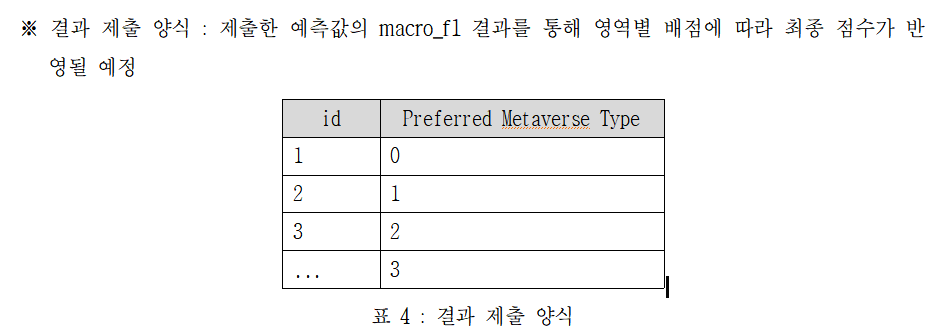

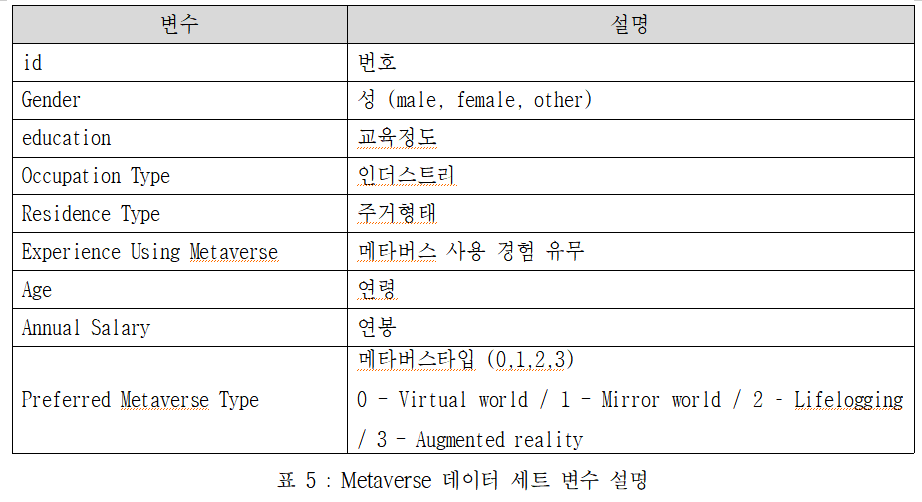

### (1) 사전 준비

#### 521-01. 데이터 불러오기

In [ ]:
# 출력을 원하실 경우 print() 함수 활용
# 예시) print(df.head())

# getcwd(), chdir() 등 작업 폴더 설정 불필요
# 파일 경로 상 내부 드라이브 경로(C: 등) 접근 불가

# 데이터 파일 읽기 예제
import pandas as pd

train_file = '06.02.01-Metaverse Training Data.csv'
X_test_file = '06.02.02-Metaverse Testing Data_x.csv'

train = pd.read_csv(path + train_file)
X_test = pd.read_csv(path + X_test_file)

# 사용자 코딩

# 답안 제출 참고
# 아래 코드 예측변수와 수험번호를 개인별로 변경하여 활용
# pd.DataFrame({'index': X_test.index, 'y_pred': pred}).to_csv('003000000.csv', index=False)

In [ ]:
print(train.head())

   Gender                   Education          Occupation Type Residence Type  \
0  female  Elementary school graduate       Wholesale industry      Apartment   
1  female           Bachelor's degree       Wholesale industry      Townhouse   
2   other                   Doctorate   Manufacturing industry      Townhouse   
3  female           Bachelor's degree  Electric power industry      Townhouse   
4    male      Middle school graduate   Manufacturing industry      Townhouse   

  Experience Using Metaverse  Age  Annual Salary  Preferred Metaverse Type  
0                         no   76         144766                         1  
1                         no   71         218622                         0  
2                        yes   50         172358                         0  
3                         no   38         472211                         1  
4                         no   10          90360                         0  


### (2) 데이터 전처리

#### 522-01. 데이터 확인하기

In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Gender                      5000 non-null   object
 1   Education                   5000 non-null   object
 2   Occupation Type             5000 non-null   object
 3   Residence Type              5000 non-null   object
 4   Experience Using Metaverse  5000 non-null   object
 5   Age                         5000 non-null   int64 
 6   Annual Salary               5000 non-null   int64 
 7   Preferred Metaverse Type    5000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 312.6+ KB
None


In [ ]:
print(X_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   id                          300 non-null    int64 
 1   Gender                      300 non-null    object
 2   Education                   300 non-null    object
 3   Occupation Type             300 non-null    object
 4   Residence Type              300 non-null    object
 5   Experience Using Metaverse  300 non-null    object
 6   Age                         300 non-null    int64 
 7   Annual Salary               300 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 18.9+ KB
None


#### 522-02. 변수별 결측치 수 확인

In [ ]:
print(train.isnull().sum())

Gender                        0
Education                     0
Occupation Type               0
Residence Type                0
Experience Using Metaverse    0
Age                           0
Annual Salary                 0
Preferred Metaverse Type      0
dtype: int64


In [ ]:
print(X_test.isnull().sum())

id                            0
Gender                        0
Education                     0
Occupation Type               0
Residence Type                0
Experience Using Metaverse    0
Age                           0
Annual Salary                 0
dtype: int64


#### 522-03. 변수 구분

In [ ]:
print(train.columns)

Index(['Gender', 'Education', 'Occupation Type', 'Residence Type',
       'Experience Using Metaverse', 'Age', 'Annual Salary',
       'Preferred Metaverse Type'],
      dtype='object')


In [ ]:
# id: 불필요한 변수
# Age, Annual Salary: 수치형 변수
# Gender, Education, Occupation Type, Residence Type: 범주형 변수
# Preferred Metaverse Type: 종속 변수

COL_DEL = ['id']
COL_NUM = ['Age', 'Annual Salary']
COL_CAT = ['Gender', 'Education', 'Occupation Type', 'Residence Type']
COL_Y = ['Preferred Metaverse Type']

#### 522-04. Train X, Y 데이터 분할

In [ ]:
X_train = train[COL_CAT + COL_NUM]
y_train = train[COL_Y]

In [ ]:
print(X_train.head())

   Gender                   Education          Occupation Type Residence Type  \
0  female  Elementary school graduate       Wholesale industry      Apartment   
1  female           Bachelor's degree       Wholesale industry      Townhouse   
2   other                   Doctorate   Manufacturing industry      Townhouse   
3  female           Bachelor's degree  Electric power industry      Townhouse   
4    male      Middle school graduate   Manufacturing industry      Townhouse   

   Age  Annual Salary  
0   76         144766  
1   71         218622  
2   50         172358  
3   38         472211  
4   10          90360  


In [ ]:
print(y_train.head())

   Preferred Metaverse Type
0                         1
1                         0
2                         0
3                         1
4                         0


### (3) 데이터 모형 구축

#### 523-01. 데이터 분할

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train
                                            , y_train.values.ravel()
                                            , test_size=0.3
                                            , stratify=y_train.values.ravel())

In [ ]:
print(X_tr.head())

      Gender                   Education     Occupation Type  \
1087   other  Elementary school graduate  Insurance industry   
3643  female        High school graduate     Retail industry   
3217    male           Bachelor's degree     Retail industry   
2586   other  Elementary school graduate    Service industry   
1241  female                   Doctorate    Fishing industry   

          Residence Type  Age  Annual Salary  
1087       Multiple home   16         297344  
3643  Single-family home   74         470326  
3217           Officetel   18         193290  
2586   Multi-family home   85         337092  
1241       Multiple home   11         303385  


In [ ]:
print(y_tr[:2])

[2 3]


#### 523-02. 수치형 변수 - 데이터 스케일링

In [ ]:
print(X_tr.describe())

               Age  Annual Salary
count  3500.000000    3500.000000
mean     52.588000  244886.980286
std      28.605275  141852.258889
min       1.000000    9520.000000
25%      28.000000  125711.500000
50%      54.000000  247803.000000
75%      78.000000  360551.000000
max     103.000000  521490.000000


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM]   = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM]  = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

In [ ]:
print(X_tr[COL_NUM].head())

           Age  Annual Salary
1087 -1.279248       0.369853
3643  0.748640       1.589479
3217 -1.209320      -0.363789
2586  1.133240       0.650100
1241 -1.454065       0.412446


#### 523-03. 범주형 변수 - 데이터 인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

X = pd.concat([X_train[COL_CAT], X_test[COL_CAT]])


for col in COL_CAT:
  le = LabelEncoder()
  le.fit(X[col])
  X_tr[col] = le.transform(X_tr[col])
  X_val[col] = le.transform(X_val[col])
  X_test[col] = le.transform(X_test[col])

  # 각 변수의 클래스 확인
  print(col)
  print(le.classes_)
  print('\n')

Gender
['female' 'male' 'other']


Education
["Bachelor's degree" 'Doctorate' 'Elementary school graduate'
 'High school graduate' "Master's degree" 'Middle school graduate']


Occupation Type
['Agriculture' 'Broadcasting industry' 'Construction industry'
 'Distribution industry' 'Electric power industry' 'Finance industry'
 'Fishing industry' 'Forestry' 'Gas industry' 'Insurance industry'
 'Maintenance industry' 'Manufacturing industry' 'Mining'
 'Repair industry' 'Retail industry' 'Service industry' 'Water industry'
 'Wholesale industry']


Residence Type
['Apartment' 'Multi-family home' 'Multiple home' 'Officetel'
 'Single-family home' 'Townhouse']




In [ ]:
print(X_tr[COL_CAT].head())

      Gender  Education  Occupation Type  Residence Type
1087       2          2                9               2
3643       0          3               14               4
3217       1          0               14               3
2586       2          2               15               1
1241       0          1                6               2


#### 523-04. 모형 학습


In [ ]:
## 0) 로지스틱 리그레션
from sklearn.linear_model import LogisticRegression
modelLR = LogisticRegression(random_state=123)
modelLR.fit(X_tr, y_tr)


## 1) 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=123)
modelRF.fit(X_tr, y_tr)

## 2) XGBoost
from xgboost import XGBClassifier
modelXGB = XGBClassifier( random_state=123)
modelXGB.fit(X_tr, y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

### (4) 데이터 모형 평가

#### 524-01. 검증 데이터로 예측값 생성

In [ ]:
y_val_predLR = modelLR.predict(X_val)
y_val_predRF = modelRF.predict(X_val)
y_val_predXGB = modelXGB.predict(X_val)

#### 524-02. 평가지표 구하기

In [ ]:
## 답안 채점 기준인 macro f1 score 사용
from sklearn.metrics import f1_score, accuracy_score

scoreLR = f1_score(y_val, y_val_predLR, average='macro')
scoreRF = f1_score(y_val, y_val_predRF, average='macro')
scoreXGB = f1_score(y_val, y_val_predXGB, average='macro')

print('Logistic Regression: \t', scoreLR)
print('Random Forest: \t', scoreRF)
print('XGBoost: \t', scoreXGB)

Logistic Regression: 	 0.2664192155562711
Random Forest: 	 0.9700871180721494
XGBoost: 	 0.9662414209969586


In [ ]:
## 참고 - metric 종류 확인
import sklearn.metrics
print(help(sklearn.metrics.f1_score)) # 함수 명은 알지만 패러미터 등 사용법을 모를 때

#### 524-03. 학습, 검증 성능 확인 함수

In [ ]:
def get_scores(model, X_tr, X_val, y_tr, y_val):

  y_tr_pred = model.predict(X_tr)
  y_val_pred = model.predict(X_val)
  tr_score = f1_score(y_tr, y_tr_pred, average='macro')
  val_score = f1_score(y_val, y_val_pred, average='macro')

  #tr_score = accuracy_score(y_tr, y_tr_pred)
  #val_score = accuracy_score(y_val, y_val_pred)

  return f'train: {round(tr_score, 4)}, valid: {round(val_score, 4)}'

In [ ]:
print('Logistic Regression \t-', get_scores(modelLR, X_tr, X_val, y_tr, y_val))
print('Random Forest \t-', get_scores(modelRF, X_tr, X_val, y_tr, y_val))
print('XGBoost \t-', get_scores(modelXGB, X_tr, X_val, y_tr, y_val))

Logistic Regression 	- train: 0.291, valid: 0.2664
Random Forest 	- train: 1.0, valid: 0.9701
XGBoost 	- train: 0.9997, valid: 0.9662


#### 524-04. 하이퍼 파라미터 튜닝

In [ ]:
modelXGB2 = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=1, random_state=123)
modelXGB2.fit(X_tr, y_tr)

modelXGB3 = XGBClassifier(n_estimators=50, max_depth=3, min_child_weight=2, random_state=123)
modelXGB3.fit(X_tr, y_tr)

modelXGB4 = XGBClassifier(n_estimators=50, max_depth=5, min_child_weight=1, random_state=123)
modelXGB4.fit(X_tr, y_tr)

modelXGB5 = XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1, random_state=123)
modelXGB5.fit(X_tr, y_tr)

print('XGBoost2 \t-', get_scores(modelXGB2, X_tr, X_val, y_tr, y_val))
print('XGBoost3 \t-', get_scores(modelXGB3, X_tr, X_val, y_tr, y_val))
print('XGBoost4 \t-', get_scores(modelXGB4, X_tr, X_val, y_tr, y_val))
print('XGBoost5 \t-', get_scores(modelXGB5, X_tr, X_val, y_tr, y_val))

XGBoost2 	- train: 0.7896, valid: 0.6969
XGBoost3 	- train: 0.7691, valid: 0.6823
XGBoost4 	- train: 0.9652, valid: 0.8994
XGBoost5 	- train: 0.9946, valid: 0.9542


#### 524-05. 최종 결과값 생성

In [ ]:
pred = modelXGB.predict(X_test[COL_CAT+COL_NUM])
result = pd.DataFrame({'ID': X_test.id, 'Segmentation': pred})
print(result.head())

   ID  Segmentation
0   1             2
1   2             1
2   3             2
3   4             2
4   5             2


In [ ]:
## 최종 결과 확인 후 to_csv 함수로 제출
result.to_csv('003000000.csv', index=False)

## 3. 작업형 제3유형

### (1) 첫 번째 문제

-  A 도시의 교통수단은 버스, 지하철, 택시, 자전거가 있다. 전문가들은 각 교통수단의 예상 비율이 각각 40%, 30%, 20%, 10%라고 예측을 했다. 이를 검증하기 위해 대중교통 이용객들이 선호하는 교통수단에 대해 설문조사를 했다. 이를 위해 수립한 귀무가설과 대립가설 및 실제 이용자수 데이터는 아래와 같다. 이에 대한 검정을 진행하시오.





> (1)주어진 설문조사 데이터에서 전체 건수 대비 Subway를 선호하는 이용자의 비율을 소수 둘째 자리로 반올림 하시오. <br>
> (2)수가 동일한 비율을 보이는지 적합도를 검정하고 검정 통계량을 소수 둘째 짜리로 반올림 하시오. <br>
> (3)위의 통계량에 대한 p-value를 구하고(소수 둘째 자리 반올림), 유의수준 0.05하에서 가설 검정의 결과를 채택, 기각 중 하나로 선택하시오.


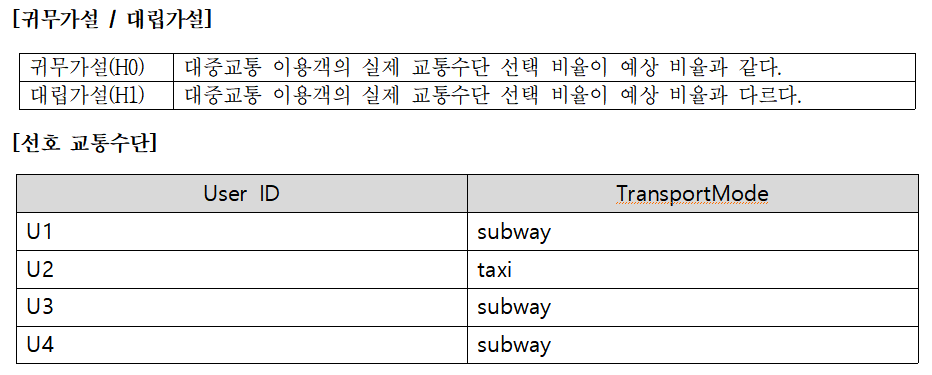

#### 531-01 데이터 불러오기

In [ ]:
#libray import
import pandas as pd
import scipy.stats as stats

In [ ]:
#file 읽어오기
file = path + '06.03.01-transport_data.csv'
df = pd.read_csv(file)
print(df.head())

  User ID TransportMode
0      U1        subway
1      U2          taxi
2      U3        subway
3      U4        subway
4      U5        subway


#### 531-02 Subway 선호 이용자 비율 구하기

In [ ]:
#관찰데이터 만들기
observed_data  = df['TransportMode'].value_counts().sort_index() #자전거, 버스, 지하철, 택시 순 정렬

print(observed_data)

bicycle    108
bus        415
subway     294
taxi       183
Name: TransportMode, dtype: int64


In [ ]:
#지하철 선호 이용자 비율 구하기
total_counts = sum(observed_data)
subway_ratio = observed_data['subway'] / total_counts
subway_ratio = round(subway_ratio, 2)

print(subway_ratio)

0.29


#### 531-03 적합도 검정, 검정 통계량 구하기

In [ ]:
#기대 빈도 만들기 - 버스, 지하철, 택시, 자전거 0.4 0.3 0.2 0.1
expected_data = pd.Series(
    {'bus':total_counts*0.4,
     'subway':total_counts*0.3,
     'taxi':total_counts*0.2,
     'bicycle':total_counts*0.1
    }
)

#자전거, 버스, 지하철, 택시 순 정렬
expected_data = expected_data.sort_index(ascending=True)

#기대빈도
expected_counts = expected_data.values

print(expected_counts)

[100. 400. 300. 200.]


In [ ]:
#관찰(실제) 빈도 만들기
observed_counts = observed_data.values
print(observed_counts)

[108 415 294 183]


In [ ]:
#검정 통계량, pval 구하기
stat, pval = stats.chisquare(list(observed_counts), list(expected_counts))
stat = round(stat,2)
print(stat)

2.77


#### 531-04 가설검정 결과 채택, 기각하기

In [ ]:
#채택 기각 하기

result = '기각'

if pval >= 0.05:
  result = '채택' #귀무가설

print(result)

채택


In [ ]:
##전체코드
#libray import
import pandas as pd
import scipy.stats as stats

#file 읽어오기
file = path + '06.03.01-transport_data.csv'
df = pd.read_csv(file)
print(df.head())

#관찰데이터 만들기
observed_data  = df['TransportMode'].value_counts().sort_index() #자전거, 버스, 지하철, 택시 순 정렬
total_counts = sum(observed_data)

#print(observed_data)

#지하철 선호 이용자 비율 구하기
subway_ratio = observed_data['subway'] / total_counts
subway_ratio = round(subway_ratio, 2)

print(subway_ratio)

#기대 빈도 데이터 만들기 - 버스, 지하철, 택시, 자전거 0.4 0.3 0.2 0.1
expected_data = pd.Series(
    {'bus':total_counts*0.4,
     'subway':total_counts*0.3,
     'taxi':total_counts*0.2,
     'bicycle':total_counts*0.1
    }
)

#자전거, 버스, 지하철, 택시 순 정렬
expected_data = expected_data.sort_index(ascending=True)

#기대빈도
expected_counts = expected_data.values

print(expected_counts)

#관찰(실제) 빈도 만들기
observed_counts = observed_data.values
print(observed_counts)


#검정 통계량, pval 구하기
stat, pval = stats.chisquare(list(observed_counts), list(expected_counts))
stat = round(stat,2)
print(stat)


#채택 기각 하기
result = '기각'

if pval >= 0.05:
  result = '채택' #귀무가설

print(result)

### (2) 두 번째 문제

- 물고기의 무게를 다중회귀분석으로 분석하고자 한다. 데이터의 구성은 아래 표와 같다. Weight를 Y변수로 Length, Height, Width, FinSize를 X 변수로 하는 다중회귀분석을 수행하고 아래에 답하시오.

> (1) Length의 회귀계수를 구하고, 소수 둘째자리로 반올림하시오. <br>
> (2) Height의 회귀계수의 P-value를 구하시오. <br>
> (3) Width의 회귀계수가 P-value 0.05를 기준으로 했을 때 통계적으로 의미가 있는지를 평가하시오. 의미가 있을 경우 'Y', 없을 경우 'N'을 출력하시오. <br>

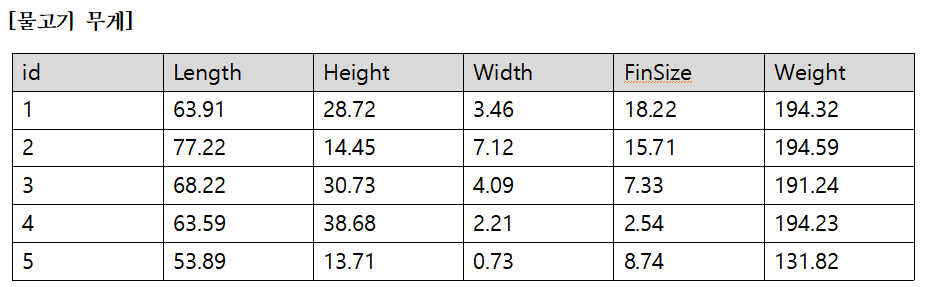

#### 532-01 데이터 불러오기

In [ ]:
#library 임포트
import pandas as pd
import statsmodels.api as sm

In [ ]:
#file 읽어오기
file = path + '06.03.02-fish_weight_data.csv'
df = pd.read_csv(file)
print(df.head())

   id  Length  Height  Width  FinSize  Weight
0   1   63.91   28.72   3.46    18.22  194.32
1   2   77.22   14.45   7.12    15.71  194.59
2   3   68.22   30.73   4.09     7.33  191.24
3   4   63.59   38.68   2.21     2.54  194.23
4   5   53.89   13.71   0.73     8.74  131.82


#### 532-02 다중회귀분석 모델 만들기

In [ ]:
#독립변수와 종속변수 설정
X_cols = ['Length', 'Height', 'Width', 'FinSize']
Y_cols = ['Weight']

In [ ]:
#독립변수, 종속변수 데이터 분리
X = df[X_cols]
y = df[Y_cols]

print(X.head())

   Length  Height  Width  FinSize
0   63.91   28.72   3.46    18.22
1   77.22   14.45   7.12    15.71
2   68.22   30.73   4.09     7.33
3   63.59   38.68   2.21     2.54
4   53.89   13.71   0.73     8.74


In [ ]:
#다중회귀 분석 수행
X = sm.add_constant(X) #상수항 추가
model = sm.OLS(y, X).fit() #분석 수행 - 모델 생성

print(model)

#### 532-03 Length 회귀 계수 구하기

In [ ]:
#Length 회귀계수 구하기 length_coef
length_coef = model.params['Length']
length_coef = round(length_coef,2)

print(length_coef)

2.04


#### 532-04 Height의 회귀계수의 p-value 구하기

In [ ]:
#height 계수의 p-value 구하기

height_pvalue = model.pvalues['Height']
#height_pvalue = round(height_pvalue,10)

print(height_pvalue)

2.0296276104742017e-51


#### 532-05 Width 회귀계수의 유의미 여부 추출

In [ ]:
#width 회귀계수의 유의미 여부 추출하기
width_coef = model.params['Width']
width_pvalue = model.pvalues['Width']

result = 'N'

if width_pvalue < 0.05:
  result = 'Y'

print(result)

Y
